Candidate Number: 277229

# SussexBudgetProductions - Report

This report has been created to provide an analysis of the data provided in the file metadata.csv, to advise on possible future measures that could result in profitable investments in this company. 


In [1]:
myfile='movie_metadata.csv'
#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

We have a total amount of 5043 entries, but not every column has a value for all rows. After talking with the person who provided the data, the decision was made to remove all the rows with a non-value cell.

In [3]:
nan_indexes = df[df[["color", "director_name", "num_critic_for_reviews", "duration", "director_facebook_likes", "actor_3_facebook_likes", "actor_2_name", "actor_1_facebook_likes", "gross", "genres", "actor_1_name", "movie_title", "num_voted_users", "cast_total_facebook_likes", "actor_3_name", "facenumber_in_poster", "plot_keywords", "movie_imdb_link", "num_user_for_reviews", "language", "country", "content_rating", "budget", "title_year", "actor_2_facebook_likes", "imdb_score", "aspect_ratio", "movie_facebook_likes"]].isnull().any(axis=1)].index
df.drop(nan_indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3755 non-null   object 
 1   director_name              3755 non-null   object 
 2   num_critic_for_reviews     3755 non-null   float64
 3   duration                   3755 non-null   float64
 4   director_facebook_likes    3755 non-null   float64
 5   actor_3_facebook_likes     3755 non-null   float64
 6   actor_2_name               3755 non-null   object 
 7   actor_1_facebook_likes     3755 non-null   float64
 8   gross                      3755 non-null   float64
 9   genres                     3755 non-null   object 
 10  actor_1_name               3755 non-null   object 
 11  movie_title                3755 non-null   object 
 12  num_voted_users            3755 non-null   int64  
 13  cast_total_facebook_likes  3755 non-null   int64

As a result of the elimination of said rows, we have 3755 entries, and no empty values in our data.

We now need to ensure there are no duplicates:

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722 entries, 0 to 3754
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3722 non-null   object 
 1   director_name              3722 non-null   object 
 2   num_critic_for_reviews     3722 non-null   float64
 3   duration                   3722 non-null   float64
 4   director_facebook_likes    3722 non-null   float64
 5   actor_3_facebook_likes     3722 non-null   float64
 6   actor_2_name               3722 non-null   object 
 7   actor_1_facebook_likes     3722 non-null   float64
 8   gross                      3722 non-null   float64
 9   genres                     3722 non-null   object 
 10  actor_1_name               3722 non-null   object 
 11  movie_title                3722 non-null   object 
 12  num_voted_users            3722 non-null   int64  
 13  cast_total_facebook_likes  3722 non-null   int64  
 1

Currently, there are 3722 entries. 

In the following graph, the correlation between all numerical columns is represented using colour: red represents strong correlations, and blue represents low correlations. 

<Axes: >

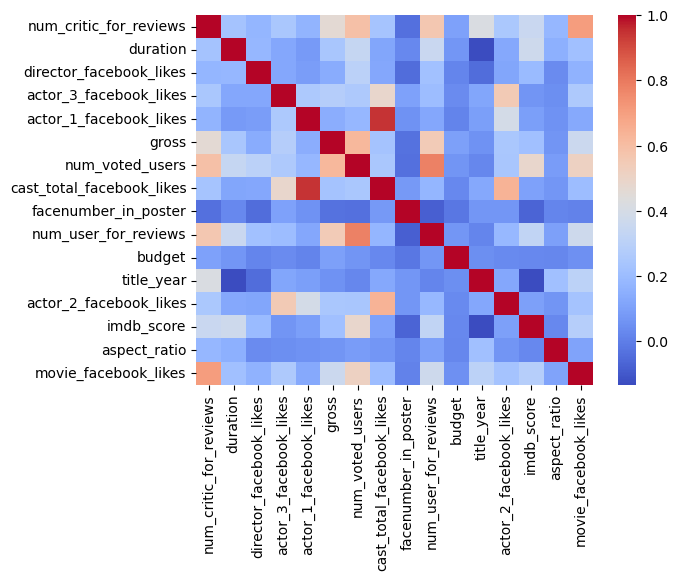

In [7]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['float64', 'int64']) 

sns.heatmap(data=numeric_df.corr(method="pearson"), cmap="coolwarm")

It is clear that not many columns are closely correlated.

We need to shift focus to non-numerical columns. The ‘genre’ column needs to be split since every entry has multiple values.

In [8]:
df['genres'] = df['genres'].str.split('|')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,"[Action, Adventure, Sci-Fi]",...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,"[Drama, Music, Romance]",...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
3751,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,[Drama],...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
3752,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,"[Drama, Sci-Fi, Thriller]",...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
3753,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,"[Action, Crime, Drama, Romance, Thriller]",...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [9]:
df_copy = df.copy()

In [10]:
df_copy =df_copy.explode('genres')

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11139 entries, 0 to 3754
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      11139 non-null  object 
 1   director_name              11139 non-null  object 
 2   num_critic_for_reviews     11139 non-null  float64
 3   duration                   11139 non-null  float64
 4   director_facebook_likes    11139 non-null  float64
 5   actor_3_facebook_likes     11139 non-null  float64
 6   actor_2_name               11139 non-null  object 
 7   actor_1_facebook_likes     11139 non-null  float64
 8   gross                      11139 non-null  float64
 9   genres                     11139 non-null  object 
 10  actor_1_name               11139 non-null  object 
 11  movie_title                11139 non-null  object 
 12  num_voted_users            11139 non-null  int64  
 13  cast_total_facebook_likes  11139 non-null  int64  
 

Now, every movie is shown as many times as the number of genres it originally had, since the column has been split.

We have 11139 entries. 

A new column needs to be added to the data frame: profit. This will be the difference between the total earnings and the budget spent. 

In [12]:
df_copy['profit'] = (df_copy['gross'] - df_copy['budget'])

display(df_copy)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Adventure,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Fantasy,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Crime,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0
3753,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Drama,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0
3753,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Romance,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0
3753,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0


In [13]:
#I needed to add the sklearn package
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_copy['numerical_genre']=le.fit_transform(df_copy['genres'])

To determine what, on average, constitutes a better investment, we need to split the data into two different datasets: 
1. higher _profit_ dataset : _profit_ $> 500.000$
2. lower _profit_ dataset : _profit_ $\leq 500.000$


In [14]:
profit_thresh = 500000
high_profit_df = df_copy[df_copy["profit"] > profit_thresh]
low_profit_df = df_copy[df_copy["profit"] <= profit_thresh]

In [15]:
high_profit_df = high_profit_df.select_dtypes(include=[np.number])
low_profit_df = low_profit_df.select_dtypes(include=[np.number])

The following is a representation and comparison of every numerical feature in our data set, and genre, which has been represented numerically to be included in these plots. 

We are visually checking the distribution for every feature, from both dataframes, including ECDFs as a measure of dissimilarity between the two sets of data. The third column of the graph represents how different the features are for high and low profit movies, which can indicate which feature is relevant to predict a profitable outcome.

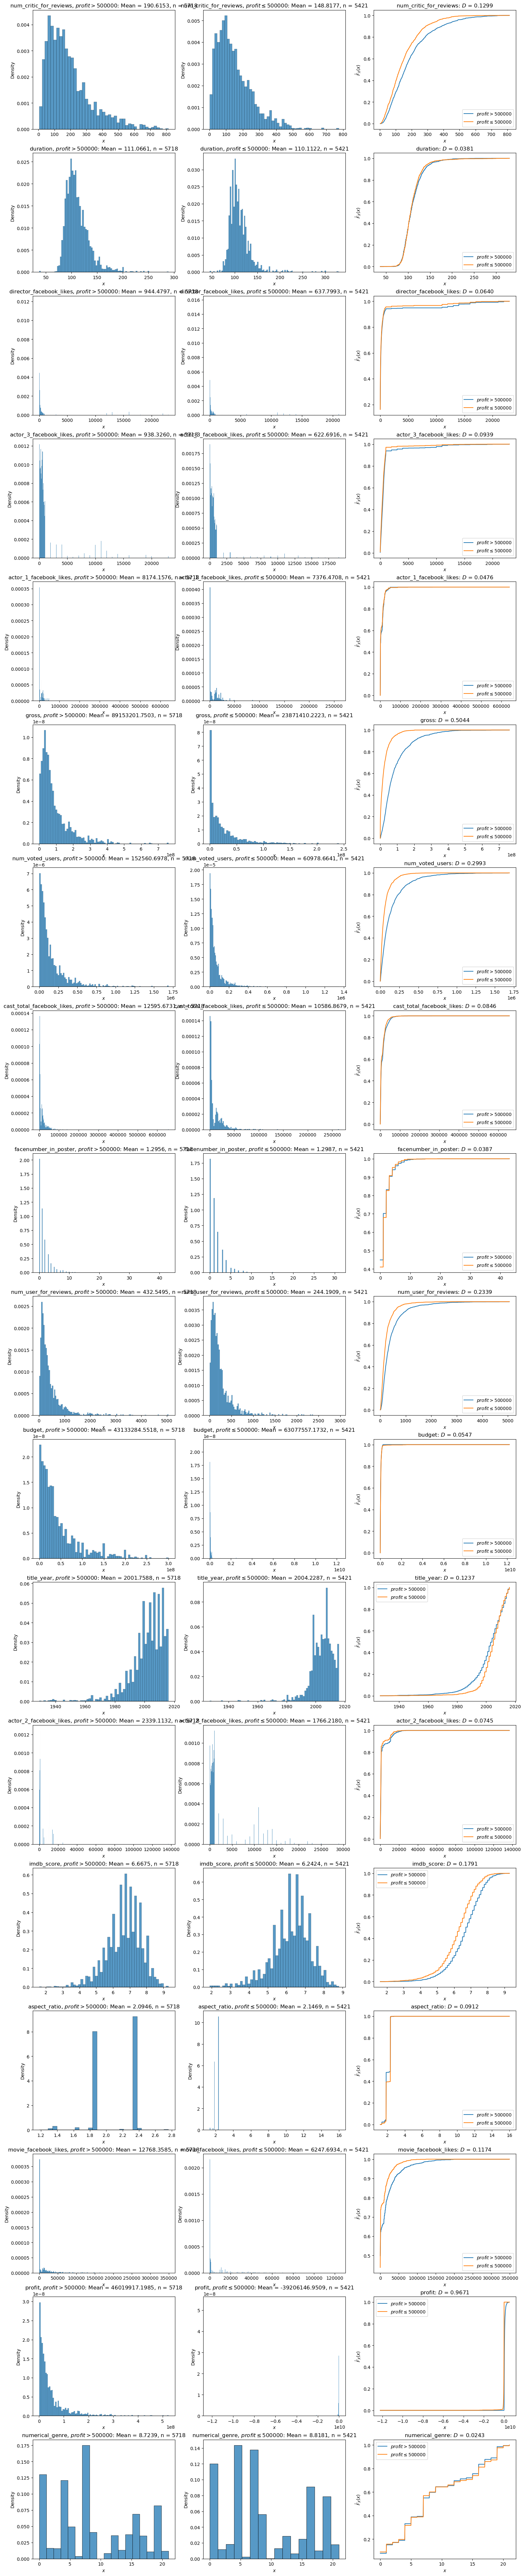

In [16]:
#edited from Lab 6 solutions
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from statsmodels.distributions.empirical_distribution import ECDF


fig, axes = plt.subplots(nrows = len(high_profit_df.columns[:]), ncols = 3)

for idx, col in enumerate(high_profit_df.columns[:]):
    qual_str = [fr"$profit > {profit_thresh}$", fr"$profit \leq {profit_thresh}$"]
    for idx2, df in enumerate([high_profit_df,low_profit_df]):
        sns.histplot(data=df,ax=axes[idx,idx2],x=col,line_kws={"lw":2},stat="density")
        mean = df[col].mean()
        axes[idx,idx2].set_title(f"{col}, {qual_str[idx2]}: Mean = {mean:.4f}, n = {len(df)}")
        axes[idx,idx2].set_xlabel(r"$x$")
    
    quality_ECDF = ECDF(high_profit_df[col])
    low_quality_ECDF = ECDF(low_profit_df[col])
    xax = np.linspace(min(high_profit_df[col].min(),low_profit_df[col].min()),max(high_profit_df[col].max(),low_profit_df[col].max()),1001)
    axes[idx,2].plot(xax,quality_ECDF(xax),label=rf"$profit > {profit_thresh}$")
    axes[idx,2].plot(xax,low_quality_ECDF(xax),label=fr"$profit \leq {profit_thresh}$")
    axes[idx,2].legend(loc="best")
    D = np.max(np.abs(quality_ECDF(xax) - low_quality_ECDF(xax)))
    axes[idx,2].set_title(fr"{col}: $D$ = {D:.4f}")
    axes[idx,2].set_xlabel(r"$x$")
    axes[idx,2].set_ylabel(r"$\hat{F}_{X}(x)$")
    
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * len(high_profit_df.columns[:-1])*1.25)

In order to determine which type of hypothesis test we have to do; we need to see if the features have a Gaussian distribution. 

To do this, we first must conduct a Kolmogorov-Smirnoff test to determine if any of the sample groups come from the same distributions at the 0.1% significance level.

In [17]:
#edited from Lab 6 solutions
from scipy.stats import ks_2samp
alpha = 0.001

sig_cols = [] 

for idx, col in enumerate(high_profit_df.columns[:]):
    _,p_value_ks = ks_2samp(high_profit_df[col],low_profit_df[col])
    if p_value_ks < alpha:
        print(f"KS: The low and high profit distributions are significantly different for {col} at the {100*alpha}% significance level, p-value = {p_value_ks}")
        sig_cols.append(col)
    else:
        print(f"KS: The low and high profit distributions are not significantly different for {col} at the {100*alpha}% significance level, p-value = {p_value_ks}")

KS: The low and high profit distributions are significantly different for num_critic_for_reviews at the 0.1% significance level, p-value = 2.2678190196028519e-41
KS: The low and high profit distributions are significantly different for duration at the 0.1% significance level, p-value = 0.0005936892003729224
KS: The low and high profit distributions are significantly different for director_facebook_likes at the 0.1% significance level, p-value = 3.282701507790952e-12
KS: The low and high profit distributions are significantly different for actor_3_facebook_likes at the 0.1% significance level, p-value = 2.454022555904327e-24
KS: The low and high profit distributions are significantly different for actor_1_facebook_likes at the 0.1% significance level, p-value = 2.767147457929198e-08
KS: The low and high profit distributions are significantly different for gross at the 0.1% significance level, p-value = 0.0
KS: The low and high profit distributions are significantly different for num_vot

The following is a visual comparison of histograms and boxplots for both high and low profit movies.

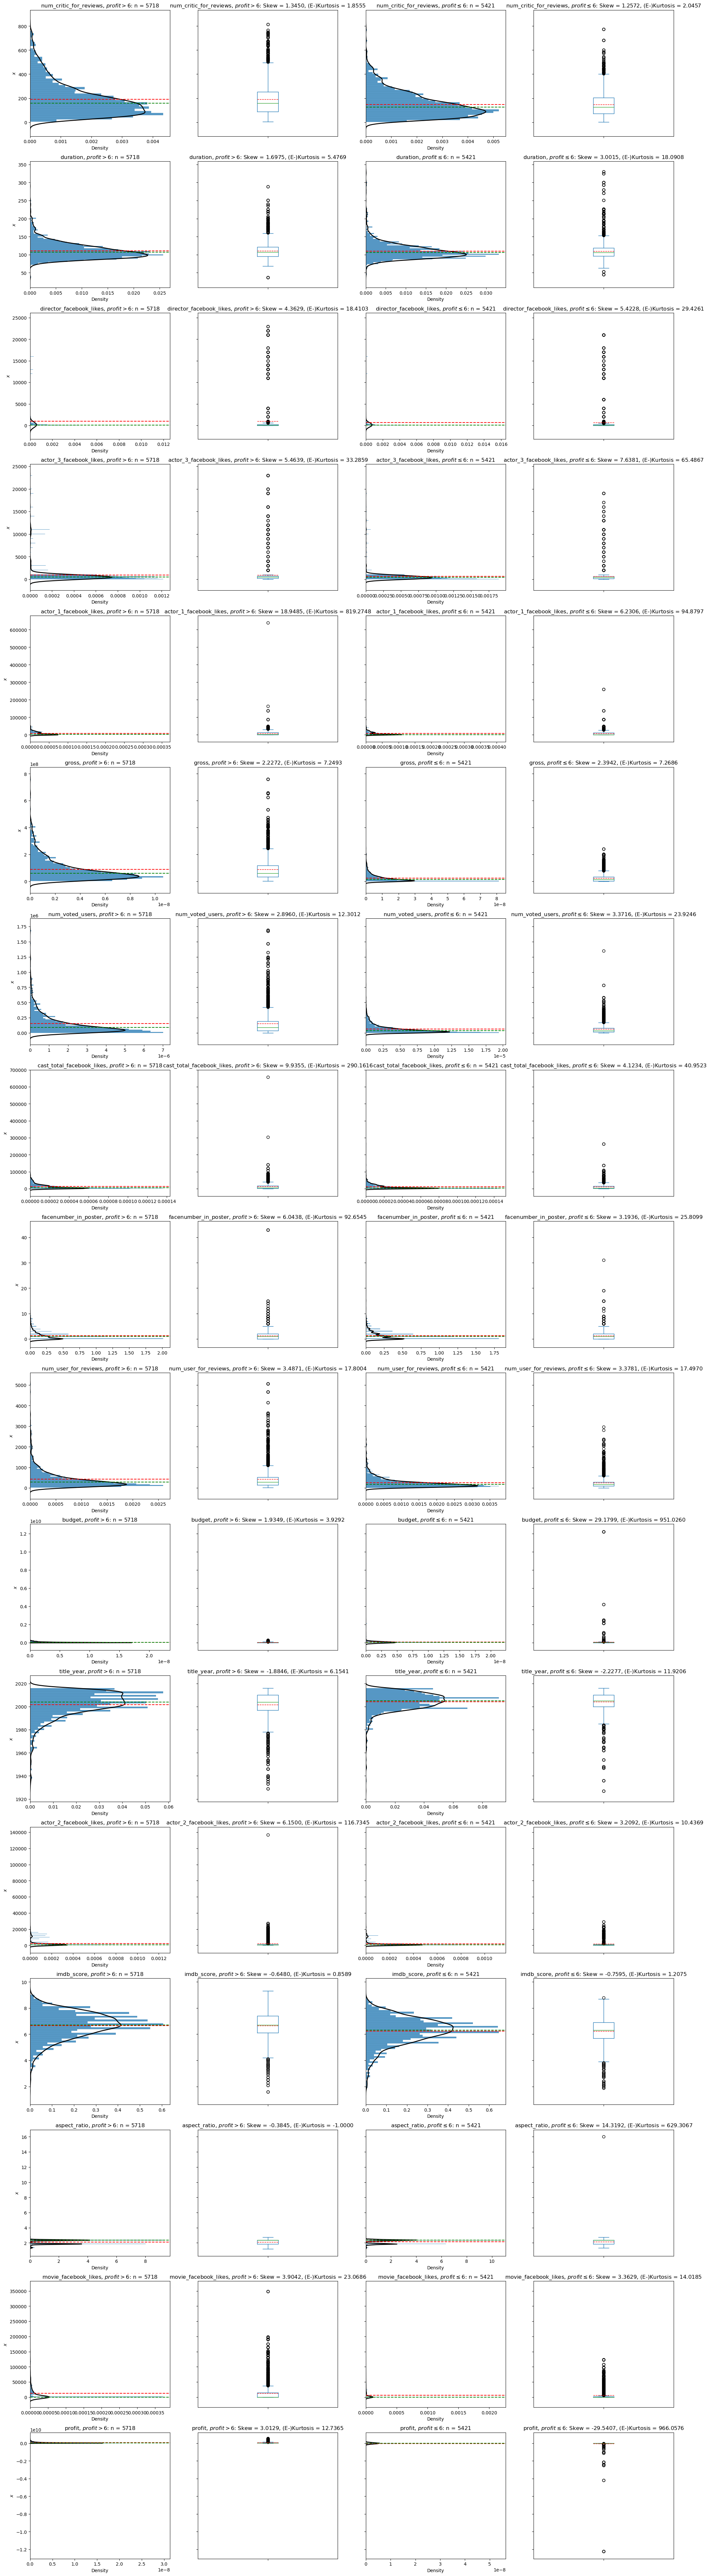

In [18]:
#edited from Lab 6 solutions
fig, axes = plt.subplots(nrows = len(sig_cols), ncols = 4, sharey="row")

for idx, col in enumerate(sig_cols):
    sns.histplot(data=high_profit_df,ax=axes[idx,0],y=col,stat="density")
    sns.kdeplot(data=high_profit_df,y=col,ax=axes[idx,0],color="k", linewidth=2)
    mean = high_profit_df[col].mean()
    median = high_profit_df[col].median()
    axes[idx,0].axhline(mean,ls="dashed",color="r")
    axes[idx,0].axhline(median,ls="dashed",color="g")
    high_profit_df.plot(kind="box",y=col,ax=axes[idx,1],meanline=True,showmeans=True,meanprops={"color":"r"})
    skew = high_profit_df[col].skew()
    kurtosis = high_profit_df[col].kurtosis()
    
    axes[idx,0].set_ylabel(r"$x$")
    axes[idx,1].set_xticklabels([""])
    axes[idx,0].set_title(rf"{col}, $profit > 6$: n = {len(high_profit_df)}")
    axes[idx,1].set_title(rf"{col}, $profit > 6$: Skew = {skew:.4f}, (E-)Kurtosis = {kurtosis:.4f}")
    
    sns.histplot(data=low_profit_df,ax=axes[idx,2],y=col,stat="density")
    sns.kdeplot(data=low_profit_df,y=col,ax=axes[idx,2],color="k", linewidth=2)
    mean = low_profit_df[col].mean()
    median = low_profit_df[col].median()
    axes[idx,2].axhline(mean,ls="dashed",color="r")
    axes[idx,2].axhline(median,ls="dashed",color="g")
    low_profit_df.plot(kind="box",y=col,ax=axes[idx,3],meanline=True,showmeans=True,meanprops={"color":"r"})
    skew = low_profit_df[col].skew()
    kurtosis = low_profit_df[col].kurtosis()
    
    axes[idx,2].set_ylabel(r"$x$")
    axes[idx,3].set_xticklabels([""])
    axes[idx,2].set_title(rf"{col}, $profit \leq 6$: n = {len(low_profit_df)}")
    axes[idx,3].set_title(rf"{col}, $profit \leq 6$: Skew = {skew:.4f}, (E-)Kurtosis = {kurtosis:.4f}")
    
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * len(sig_cols)*1.25)

We can see that no feature will be able to pass a normality test since we make that consideration when skew and excess kurtosis are between -0.5 and 0.5.

Finally, we see if either of the sample groups can be rejected as a Gaussian at 0.1% significance, for all the features that failed the Kolmogorov-Smirnoff test, by conducting a D'Agostino's Ksquared test.

If both datasets are rejected, we then use a Lilliefors test to conclude whether they are Gaussian at 0.1% significance. 

In [19]:
#edited from Lab 6 solutions
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import lilliefors

norm_cols = []
not_norm_cols = [] 

for col in sig_cols:
    _,p_value_n_q = normaltest(high_profit_df[col])
    _,p_value_n_lq = normaltest(low_profit_df[col])
    
    if (p_value_n_q < alpha) or (p_value_n_lq < alpha):
        print(f"KSquared: At least one {col} distribution is statistically not Gaussian at the {100*alpha}% significance level, ({p_value_n_q},{p_value_n_lq})")
        not_norm_cols.append(col)
    else:
        _,p_value_lf_q = lilliefors(high_profit_df[col],dist="norm")
        _,p_value_lf_lq = lilliefors(low_profit_df[col],dist="norm")
        
        if (p_value_lf_q < alpha) and (p_value_lf_lq < alpha):
            print(f"Lilliefors: Both {col} distributions are statistically Gaussian at the {100*alpha}% significance level, ({p_value_lf_q},{p_value_lf_lq})")
            norm_cols.append(col)
        else:
            print(f"Lilliefors: At least one {col} distributions are not statistically Gaussian at the {100*alpha}% significance level, ({p_value_lf_q},{p_value_lf_lq})")
            not_norm_cols.append(col)

KSquared: At least one num_critic_for_reviews distribution is statistically not Gaussian at the 0.1% significance level, (1.1440980092550039e-278,1.7491550705672896e-251)
KSquared: At least one duration distribution is statistically not Gaussian at the 0.1% significance level, (0.0,0.0)
KSquared: At least one director_facebook_likes distribution is statistically not Gaussian at the 0.1% significance level, (0.0,0.0)
KSquared: At least one actor_3_facebook_likes distribution is statistically not Gaussian at the 0.1% significance level, (0.0,0.0)
KSquared: At least one actor_1_facebook_likes distribution is statistically not Gaussian at the 0.1% significance level, (0.0,0.0)
KSquared: At least one gross distribution is statistically not Gaussian at the 0.1% significance level, (0.0,0.0)
KSquared: At least one num_voted_users distribution is statistically not Gaussian at the 0.1% significance level, (0.0,0.0)
KSquared: At least one cast_total_facebook_likes distribution is statistically n

We have now proven that we are not dealing with Gaussian distributions, which means that we need to apply bootstrapping to conduct hypothesis tests. 

Bootstrapping is a technique used in statistics when dealing with no-normal distributions. It works by resampling the original sample, which acts as the population, to obtain confidence intervals for mean, median, and standard deviation.

In [20]:
#edited from Lab 6 solutions
def bootstrap_diff_means(data_1,data_2,num_bootstraps=10000,tail="two"):
    m_1 = np.mean(data_1)
    m_2 = np.mean(data_2)
    v_1 = np.var(data_1, ddof=1)
    v_2 = np.var(data_2, ddof=1)
    n_1 = len(data_1)
    n_2 = len(data_2)
    se = np.sqrt(v_1/n_1 + v_2/n_2)
    t_stat = (m_1 - m_2)/se

    comb_m = (np.sum(data_1) + np.sum(data_2))/(n_1 + n_2)

    adj_col1 = data_1 - m_1 + comb_m
    adj_col2 = data_2 - m_2 + comb_m

    count = 0
    for _ in range(num_bootstraps):
        bs_1 = np.array([adj_col1[i] for i in np.random.randint(0,n_1,size=n_1)])
        bs_2 = np.array([adj_col2[i] for i in np.random.randint(0,n_2,size=n_2)]) 
        
        bs_m_1 = np.mean(bs_1)
        bs_m_2 = np.mean(bs_2)
        bs_v_1 = np.var(bs_1,ddof=1)
        bs_v_2 = np.var(bs_2,ddof=1)
        bs_se = np.sqrt(bs_v_1/n_1 + bs_v_2/n_2)
        
        bs_t_stat = (bs_m_1 - bs_m_2)/bs_se
        
        if tail == "two":
            if np.abs(bs_t_stat) >= np.abs(t_stat):
                count += 1
        elif tail == "less":
            if bs_t_stat <= t_stat:
                count += 1
        elif tail == "greater":
            if bs_t_stat >= t_stat:
                count += 1

    return m_1 - m_2, t_stat, (count+1)/(num_bootstraps+1)



In [21]:
#edited from Lab 6 solutions
sig_mean_cols = []
dbars = [] 
for col in not_norm_cols:
    
    data_1 = high_profit_df[col].to_numpy()
    data_2 = low_profit_df[col].to_numpy()
    
    if np.mean(data_1) - np.mean(data_2) < 0:
        tail = "less"
    else:
        tail = "greater"
    
    dbar, _, p_value_bs = bootstrap_diff_means(data_1,data_2,tail=tail)
    if p_value_bs < alpha:
        print(f"Bootstrap: There is significant evidence to state that the average {col} levels for profit > {profit_thresh} is different to profit <= {profit_thresh} at the {100*alpha}% significance level, p-value = {p_value_bs}")
        sig_mean_cols.append(col)
        dbars.append(dbar)
    else:
        print(f"Bootstrap: There is not significant evidence to state that the average {col} levels for profit > {profit_thresh} is different to profit <= {profit_thresh} at the {100*alpha}% significance level, p-value = {p_value_bs}")

Bootstrap: There is significant evidence to state that the average num_critic_for_reviews levels for profit > 500000 is different to profit <= 500000 at the 0.1% significance level, p-value = 9.999000099990002e-05
Bootstrap: There is not significant evidence to state that the average duration levels for profit > 500000 is different to profit <= 500000 at the 0.1% significance level, p-value = 0.015198480151984802
Bootstrap: There is significant evidence to state that the average director_facebook_likes levels for profit > 500000 is different to profit <= 500000 at the 0.1% significance level, p-value = 9.999000099990002e-05
Bootstrap: There is significant evidence to state that the average actor_3_facebook_likes levels for profit > 500000 is different to profit <= 500000 at the 0.1% significance level, p-value = 9.999000099990002e-05
Bootstrap: There is significant evidence to state that the average actor_1_facebook_likes levels for profit > 500000 is different to profit <= 500000 at t

We can see that most features are relevant when it comes to a profitable outcome, however, not all of them are actionable. 

I have conducted a difference of means bootstrap test on the two samples to check if the averages are different at the 0.1% significance level:

Hypothesis statement: “Profit will be higher on average, depending on the director hired” – the following right-side tail test must be conducted :
 \begin{align*}
\mathbf{H}_0 \quad &: \quad \mu_{hq} - \mu_{lq} = 0 \\
\mathbf{H}_1 \quad &: \quad \mu_{hq} - \mu_{lq} > 0
\end{align*}

where $\mu_{hq}$ denotes the mean of the high profit sample group and $\mu_{lq}$ denotes the mean of the low profit sample group.

Since the 𝑝
-𝑣𝑎𝑙𝑢𝑒 from the bootstrapped test of the difference of means is less than our chosen significance 9.999000099990002e-05, we reject the null hypothesis at 0.1% significance level. That is, **there is sufficient evidence to state that the director of a movie is significantly related to its profit.**


In [22]:
director = pd.concat([df_copy.director_name,df_copy.profit,df_copy.budget],axis=1)
director.reset_index(drop=True)
director_df = pd.DataFrame(director)
director_df.rename(columns={'director_name':'director'},inplace=True)
director_df = director_df[director_df.budget < 1500000]
director_df

,director,profit,budget
1210,Martin Scorsese,-467355.0,500000.0
1210,Martin Scorsese,-467355.0,500000.0
1210,Martin Scorsese,-467355.0,500000.0
1210,Martin Scorsese,-467355.0,500000.0
2063,Alfred Hitchcock,31193053.0,806947.0
...,...,...,...
3753,Robert Rodriguez,2033920.0,7000.0
3753,Robert Rodriguez,2033920.0,7000.0
3753,Robert Rodriguez,2033920.0,7000.0
3753,Robert Rodriguez,2033920.0,7000.0


In [23]:
director_top_20 = director_df.groupby('director')['profit'].sum().sort_values(ascending=False)[:20]
director_top_20 = director_top_20.reset_index()
director_top_20 = pd.DataFrame(director_top_20)

This graph shows the top 20 directors that can lead to a profitable movie when using a budget of £1.5M.

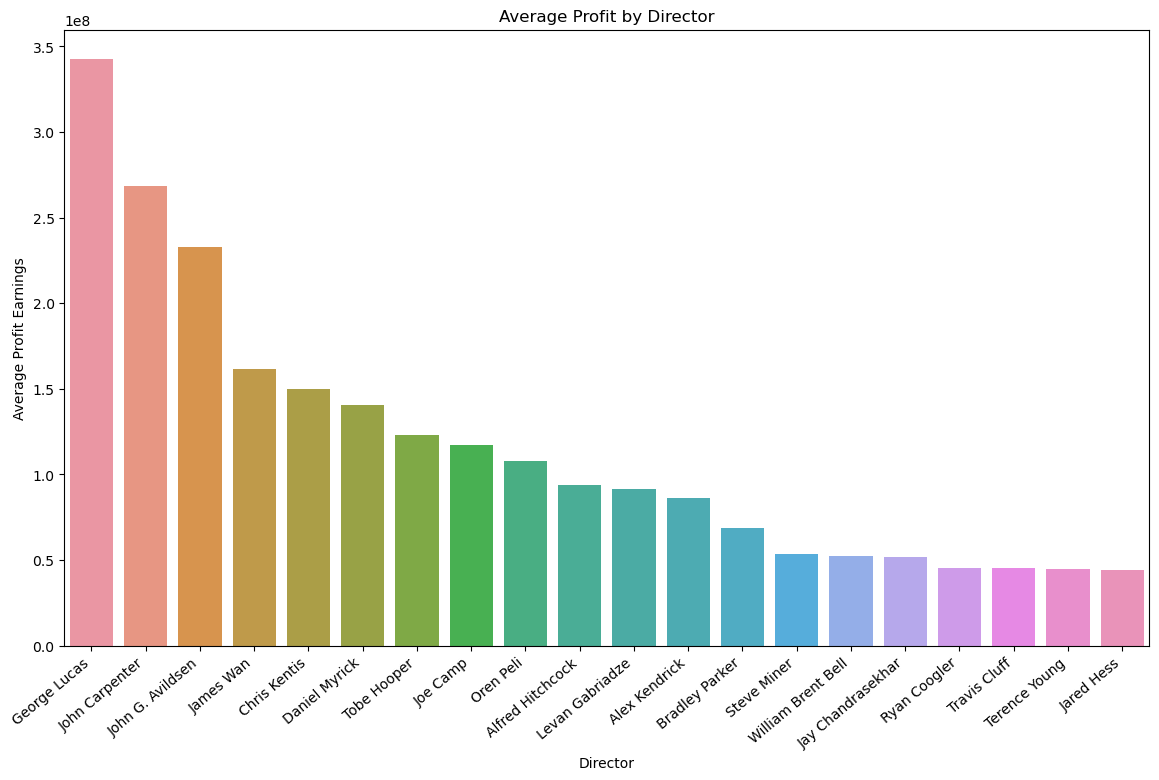

In [24]:
plt.figure(figsize=(14, 8))
sns.barplot(x='director', y='profit', data=director_top_20, errorbar=None, estimator='mean')
plt.title('Average Profit by Director')
plt.xlabel('Director')
plt.ylabel('Average Profit Earnings')
plt.xticks(rotation=40, ha='right')
plt.show()

# Summary

This report has been conducted in an effort to create an appropriate course of action for the company SussexBudgetProductions, reducing uncertainty regarding future investments and their outcomes. 

Using the IMDb file provided, I conducted an analysis which started by removing all rows that contained an empty cell, eliminating duplicate rows and separating the ‘genre’ column, which had several entries per cell. 

Later on, a visual representation of the correlation between all numerical features could only determine certain correlations between features that didn’t represent an actionable hypothesis.  

The focus of the analysis shifted to favour Profit. 

The data frame needed to be divided into two, for movies with high and low profits. I plotted a series of graphs, comparing the distribution of each feature, for both data frames, and calculating ECDF, which measures the difference between the two. This was done to find out if we can attribute more successful profits to a particular feature.

I conducted three tests to check if the distributions were Gaussian: 

-Kolmogorov-Smirnoff

-Visual check for histograms and box-plots.

-D'Agostino's Ksquared and Lilliefors tests


The conclusion was that none of the features followed a normal distribution, which is what led me to bootstrapping. 

From the results of bootstrapping, I decided to choose an actionable feature, the director, since the number of likes of a director was proven relevant for profits. 

The final conclusion of this report can be seen in **Top 20 Directors**. Given the budget of £1.5 million, these names are more likely to provide a profitable outcome in future movies. 
